<a href="https://colab.research.google.com/github/sashini472/Project-Phase-2/blob/main/Datathon_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural Language Processing**

Importing libraries

In [ ]:
# Import the pandas library and alias it as 'pd'
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Import the necessary libraries for data cleaning
import re  # Regular expressions library for text manipulation
from datetime import datetime  # Library for handling dates and times

# Import the necessary libraries for Text Data Standardization
!pip install contractions
import contractions

# Import the necessary libraries for tokenization
!pip install nltk
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

# Import the 'stopwords' corpus from the Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords
nltk.download('stopwords')


# Import the necessary libraries for a word cloud
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Import the necessary libraries for lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 5.2 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Importing dataframe

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/ML_final_project /Articles.csv', encoding='ISO-8859-1')


In [ ]:
print(df.columns)


Index(['Title', 'Abstract', 'Discussion '], dtype='object')


In [ ]:
# Select specific columns ('Title', 'Abstract', 'Discussion') from the DataFrame
df = df[['Title', 'Abstract', 'Discussion ']]

# Display the first few rows (head) of the DataFrame to inspect the data
df.head()

,Title,Abstract,Discussion
0,A blockchain-based federated learning mechanis...,The Corona virus outbreak sped up the process ...,The findings of the research are discussed in ...
1,A Classification Algorithm-Based Hybrid Diabet...,Diabetes is considered to be one of the leadin...,"Based on the results given in Tables 5, â,6,..."
2,A high-throughput structural dynamics approach...,Diabetes mellitus is a metabolic disorder that...,"""The optimized 3D model of FFAR4 provides insi..."
3,A Machine Learning Web App to Predict Diabetic...,"Over the past few decades, diabetes has become...",ML algorithms can identify the patterns in a d...
4,A machine learning-based framework to identify...,Objective: To discover diverse genotype-phenot...,Traditional expert algorithms use a wide range...


In [ ]:
# Combine 'Abstract' and 'Discussion' and 'Title' into a new column 'Combined_Text'
df['Text'] = df['Title']+ ' ' + df['Abstract'] + ' ' + df['Discussion ']

# Drop the original 'Abstract' and 'Discussion' and 'Title' columns if needed
df = df.drop(['Abstract', 'Discussion ', 'Title'], axis=1)

# Display the first few rows (head) of the DataFrame with the combined text
df.head()

,Text
0,A blockchain-based federated learning mechanis...
1,A Classification Algorithm-Based Hybrid Diabet...
2,A high-throughput structural dynamics approach...
3,A Machine Learning Web App to Predict Diabetic...
4,A machine learning-based framework to identify...


Text cleaning

Handling Text Contractions

In [ ]:
# Define a cleaning function that will replace the incorrectly encoded characters.
def clean_encoding(text):
    text = text.replace('¡¯', "'")  # Replace the sequence that represents a single quote
    return text

# Apply the cleaning function to the 'Text'column of the DataFrame.
df['Text'] = df['Text'].apply(clean_encoding)
df.head()


,Text
0,A blockchain-based federated learning mechanis...
1,A Classification Algorithm-Based Hybrid Diabet...
2,A high-throughput structural dynamics approach...
3,A Machine Learning Web App to Predict Diabetic...
4,A machine learning-based framework to identify...


In [ ]:
# Expand contractions in the 'Text' column
df['Text_expanded'] = df['Text'].apply(lambda x: contractions.fix(x))
df.head()



,Text,Text_expanded
0,A blockchain-based federated learning mechanis...,A blockchain-based federated learning mechanis...
1,A Classification Algorithm-Based Hybrid Diabet...,A Classification Algorithm-Based Hybrid Diabet...
2,A high-throughput structural dynamics approach...,A high-throughput structural dynamics approach...
3,A Machine Learning Web App to Predict Diabetic...,A Machine Learning Web App to Predict Diabetic...
4,A machine learning-based framework to identify...,A machine learning-based framework to identify...


Text Data Standardization



In [ ]:
# Let's perform some basic data cleaning tasks such as:
# - Lowercasing the 'Text' column texts
# - Removing special characters and numbers


# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

# Perform the data cleaning
df['Text'] = df['Text_expanded'].str.lower()
df['Text'] = df['Text'].apply(remove_special_characters)




In [ ]:
df.head()

,Text,Text_expanded
0,a blockchainbased federated learning mechanism...,A blockchain-based federated learning mechanis...
1,a classification algorithmbased hybrid diabete...,A Classification Algorithm-Based Hybrid Diabet...
2,a highthroughput structural dynamics approach ...,A high-throughput structural dynamics approach...
3,a machine learning web app to predict diabetic...,A Machine Learning Web App to Predict Diabetic...
4,a machine learningbased framework to identify ...,A machine learning-based framework to identify...


Tokenization

In [ ]:
def tokenize_text(text):
   return word_tokenize(text)

df['tokens'] = df['Text'].apply(tokenize_text)
df.head()

,Text,Text_expanded,tokens
0,a blockchainbased federated learning mechanism...,A blockchain-based federated learning mechanis...,"[a, blockchainbased, federated, learning, mech..."
1,a classification algorithmbased hybrid diabete...,A Classification Algorithm-Based Hybrid Diabet...,"[a, classification, algorithmbased, hybrid, di..."
2,a highthroughput structural dynamics approach ...,A high-throughput structural dynamics approach...,"[a, highthroughput, structural, dynamics, appr..."
3,a machine learning web app to predict diabetic...,A Machine Learning Web App to Predict Diabetic...,"[a, machine, learning, web, app, to, predict, ..."
4,a machine learningbased framework to identify ...,A machine learning-based framework to identify...,"[a, machine, learningbased, framework, to, ide..."


Removing stop words

In [ ]:
# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df['tokens_no_stop'] = df['tokens'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'tweet', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df[['tokens', 'tokens_no_stop']].head()

,tokens,tokens_no_stop
0,"[a, blockchainbased, federated, learning, mech...","[blockchainbased, federated, learning, mechani..."
1,"[a, classification, algorithmbased, hybrid, di...","[classification, algorithmbased, hybrid, diabe..."
2,"[a, highthroughput, structural, dynamics, appr...","[highthroughput, structural, dynamics, approac..."
3,"[a, machine, learning, web, app, to, predict, ...","[machine, learning, web, app, predict, diabeti..."
4,"[a, machine, learningbased, framework, to, ide...","[machine, learningbased, framework, identify, ..."


In [ ]:
# Define additional context-sensitive stop words
context_sensitive_stop_words = set(['accuracy', 'performance', 'machine', 'algorithm', 'dataset', 'predict', 'predicts', 'predicted', 'predicting', 'feature', 'show', 'shows', 'showed', 'ml', 'base'
                                    'method', 'value', 'predictive', 'also', 'level', 'classification', 'develop', 'technique', 'auc', 'classifier', 'model', 'models', 'et', 'al',
                                    'machine', 'learning','algorithm', 'algorithms', 'diabetes', 'type', 'mellitus', 'artificial', 'intelligence', 'ai', 'study', 'studies',
                                    'data', 'prediction', 'result', 'useful', 'results', 'use', 'uses', 'used','widelyused', 'usercentric', 'userfriendly', 'usefulness', 'focuses',
                                    'because', 'feature', 'features', 'patient', 'patients', 'include','includes', 'included', 'compare', 'may', 'compares', 'compared', 'causes', 'different',
                                    'high', 'highthroughput', 'highrisk', 'approach', 'identify', 'background', 'dm', 'neural', 'networks', 'using', 't2dm', 'methods', 'shows', 'based', 'researched', 'research', 'tdm', 'risk', 'risked'
                                    'disease', 'diseases', 'population', 'populations', 'best', 'system', 'report', 'provide', 'well', 'glucose', 'diabetic', 'machinelearning', 'application', 'supervised'])

# English stop words
stop_words_set = set(stopwords.words('english'))

# Extend the previously defined function to remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
df['tokens_no_stop_context'] = df['tokens'].apply(remove_context_sensitive_stop_words)

# Display the DataFrame
df[['Text', 'tokens', 'tokens_no_stop_context']].head(20)


,Text,tokens,tokens_no_stop_context
0,a blockchainbased federated learning mechanism...,"[a, blockchainbased, federated, learning, mech...","[blockchainbased, federated, mechanism, privac..."
1,a classification algorithmbased hybrid diabete...,"[a, classification, algorithmbased, hybrid, di...","[algorithmbased, hybrid, considered, one, lead..."
2,a highthroughput structural dynamics approach ...,"[a, highthroughput, structural, dynamics, appr...","[structural, dynamics, identification, potenti..."
3,a machine learning web app to predict diabetic...,"[a, machine, learning, web, app, to, predict, ...","[web, app, blood, basic, noninvasive, health, ..."
4,a machine learningbased framework to identify ...,"[a, machine, learningbased, framework, to, ide...","[learningbased, framework, electronic, health,..."
5,a mobile app that addresses interpretability c...,"[a, mobile, app, that, addresses, interpretabi...","[mobile, app, addresses, interpretability, cha..."
6,a novel stacking ensemble for detecting three ...,"[a, novel, stacking, ensemble, for, detecting,...","[novel, stacking, ensemble, detecting, three, ..."
7,a scoping review of artificial intelligencebas...,"[a, scoping, review, of, artificial, intellige...","[scoping, review, intelligencebased, increasin..."
8,a survey on diabetes risk prediction using mac...,"[a, survey, on, diabetes, risk, prediction, us...","[survey, approaches, chronic, condition, lead,..."
9,an ai dietitian for type diabetes mellitus ma...,"[an, ai, dietitian, for, type, diabetes, melli...","[dietitian, management, large, language, image..."


Lemmatization

In [ ]:
# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df['lemmatized'] = df['tokens_no_stop_context'].apply(lemmatize_tokens_with_pos)

df[['Text', 'tokens', 'tokens_no_stop_context', 'lemmatized']].head(20)


,Text,tokens,tokens_no_stop_context,lemmatized
0,a blockchainbased federated learning mechanism...,"[a, blockchainbased, federated, learning, mech...","[blockchainbased, federated, mechanism, privac...","[blockchainbased, federate, mechanism, privacy..."
1,a classification algorithmbased hybrid diabete...,"[a, classification, algorithmbased, hybrid, di...","[algorithmbased, hybrid, considered, one, lead...","[algorithmbased, hybrid, consider, one, lead, ..."
2,a highthroughput structural dynamics approach ...,"[a, highthroughput, structural, dynamics, appr...","[structural, dynamics, identification, potenti...","[structural, dynamic, identification, potentia..."
3,a machine learning web app to predict diabetic...,"[a, machine, learning, web, app, to, predict, ...","[web, app, blood, basic, noninvasive, health, ...","[web, app, blood, basic, noninvasive, health, ..."
4,a machine learningbased framework to identify ...,"[a, machine, learningbased, framework, to, ide...","[learningbased, framework, electronic, health,...","[learningbased, framework, electronic, health,..."
5,a mobile app that addresses interpretability c...,"[a, mobile, app, that, addresses, interpretabi...","[mobile, app, addresses, interpretability, cha...","[mobile, app, address, interpretability, chall..."
6,a novel stacking ensemble for detecting three ...,"[a, novel, stacking, ensemble, for, detecting,...","[novel, stacking, ensemble, detecting, three, ...","[novel, stack, ensemble, detect, three, type, ..."
7,a scoping review of artificial intelligencebas...,"[a, scoping, review, of, artificial, intellige...","[scoping, review, intelligencebased, increasin...","[scoping, review, intelligencebased, increase,..."
8,a survey on diabetes risk prediction using mac...,"[a, survey, on, diabetes, risk, prediction, us...","[survey, approaches, chronic, condition, lead,...","[survey, approach, chronic, condition, lead, v..."
9,an ai dietitian for type diabetes mellitus ma...,"[an, ai, dietitian, for, type, diabetes, melli...","[dietitian, management, large, language, image...","[dietitian, management, large, language, image..."


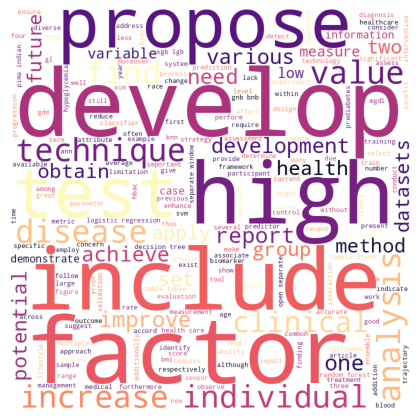

In [ ]:
# Combine all tokens from the 'lemmatized' column into a single list
all_tokens = sum(df['lemmatized'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='magma',  # Use the 'magma' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# **LSTM**

Importing the data

In [ ]:
# Import libraries
from google.colab import files
import os
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay, accuracy_score, auc
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.impute import SimpleImputer
import warnings
from sklearn.datasets import load_iris
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.pipeline import Pipeline

!pip install category_encoders
from category_encoders import OneHotEncoder, TargetEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils.class_weight import compute_class_weight

import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
from itertools import product
from sklearn.metrics import precision_score, f1_score, roc_auc_score, recall_score

!pip install missingno
import missingno as msno

warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 579.7 kB/s eta 0:00:00


In [ ]:
#Import data
imported=files.upload()
df= pd.read_excel('Diabetes.xlsx')

Saving Diabetes.xlsx to Diabetes.xlsx


In [ ]:
df.head(10)

,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,...,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES
0,65,126.0,2013-06-11,31.000000,2013-06-11,1.66,2013-06-14,1.11,2013-06-14,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000255903,NaT,NaT,No
1,62,135.0,2014-06-19,25.846483,2014-10-17,2.49,2014-05-28,1.37,2014-05-28,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000256456,NaT,NaT,No
2,63,133.0,2012-07-31,30.900000,2011-12-01,1.65,2012-06-01,NaN,NaT,6.1,...,NaN,NaN,NaN,NaN,NaN,NaN,1001000000000054,NaT,NaT,No
3,51,136.0,2014-01-06,56.710775,2014-01-06,2.80,2014-01-14,1.94,2014-01-14,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000259496,NaT,NaT,No
4,40,123.0,2015-06-12,33.067867,2015-06-12,2.48,2015-06-24,1.17,2015-06-24,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000262094,NaT,NaT,No
5,60,130.0,2013-12-09,67.751227,2013-10-23,2.20,2013-11-04,1.38,2013-11-04,6.1,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000256753,NaT,NaT,No
6,41,129.0,2014-06-23,37.471938,2014-06-23,2.60,2014-06-14,1.02,2014-06-14,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000258794,NaT,NaT,No
7,70,150.0,2014-08-13,25.500000,2014-09-15,2.05,2014-07-30,1.09,2014-07-30,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000260906,NaT,NaT,No
8,70,123.0,2014-10-01,33.000000,2015-01-16,2.08,2014-08-06,1.56,2014-08-06,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000281214,NaT,NaT,No
9,54,104.0,2015-06-11,25.333598,2015-06-11,3.07,2015-06-17,1.43,2015-06-17,5.6,...,NaN,NaN,NaN,NaN,NaN,NaN,4001000000260726,NaT,NaT,No


Data preprocessing

In [ ]:
#Dropping varibales
df.drop(['DIABETES','Hypertension_Medications','Corticosteroids','sBP_Date','FBS','BMI_Date','LDL_Date','HDL_Date','A1c_Date','TG_Date','FBS_Date','FBS>DM','Total_Cholesterol_Lab_Date','DM_OnsetDate','Depression_OnsetDate','HTN_OnsetDate','OA_OnsetDate','COPD_Date','Hypertension_Medications_First_Instance','Corticosteroids_first_instance','leastO(A1c_Date)','leastO(DM_OnsetDate)','leastO(FBS_Date)','LeastOfAll','A1C_BEF_DM','FBS_BEF_DM','DM_Onset_Revised','DM_Onset_Revised_1YrPrior','OA','COPD'], axis=1, inplace=True)

In [ ]:
df.head(10)

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,Total_Cholesterol,Diabetes,Depression,HTN,Sex,Patient_ID
0,65,126.0,31.000000,1.66,1.11,5.4,2.28,3.81,0,0,0,Female,4001000000255903
1,62,135.0,25.846483,2.49,1.37,5.8,1.37,4.48,0,0,1,Female,4001000000256456
2,63,133.0,30.900000,1.65,NaN,6.1,0.76,NaN,0,0,1,Male,1001000000000054
3,51,136.0,56.710775,2.80,1.94,6.0,0.99,5.19,0,0,0,Female,4001000000259496
4,40,123.0,33.067867,2.48,1.17,5.8,1.04,4.12,0,1,0,Female,4001000000262094
5,60,130.0,67.751227,2.20,1.38,6.1,0.76,3.93,0,0,1,Female,4001000000256753
6,41,129.0,37.471938,2.60,1.02,5.5,0.80,3.98,0,0,1,Female,4001000000258794
7,70,150.0,25.500000,2.05,1.09,5.8,1.04,3.61,0,0,1,Male,4001000000260906
8,70,123.0,33.000000,2.08,1.56,5.4,1.13,4.15,0,1,1,Female,4001000000281214
9,54,104.0,25.333598,3.07,1.43,5.6,1.63,5.24,0,0,1,Male,4001000000260726


In [ ]:
#Determine missing values
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_percentages

Age_at_Exam          0.00
sBP                  0.04
BMI                  0.00
LDL                  0.61
HDL                  0.72
A1c                  0.00
TG                   0.53
Total_Cholesterol    2.07
Diabetes             0.00
Depression           0.00
HTN                  0.00
Sex                  0.00
Patient_ID           0.00
dtype: float64

<Axes: >

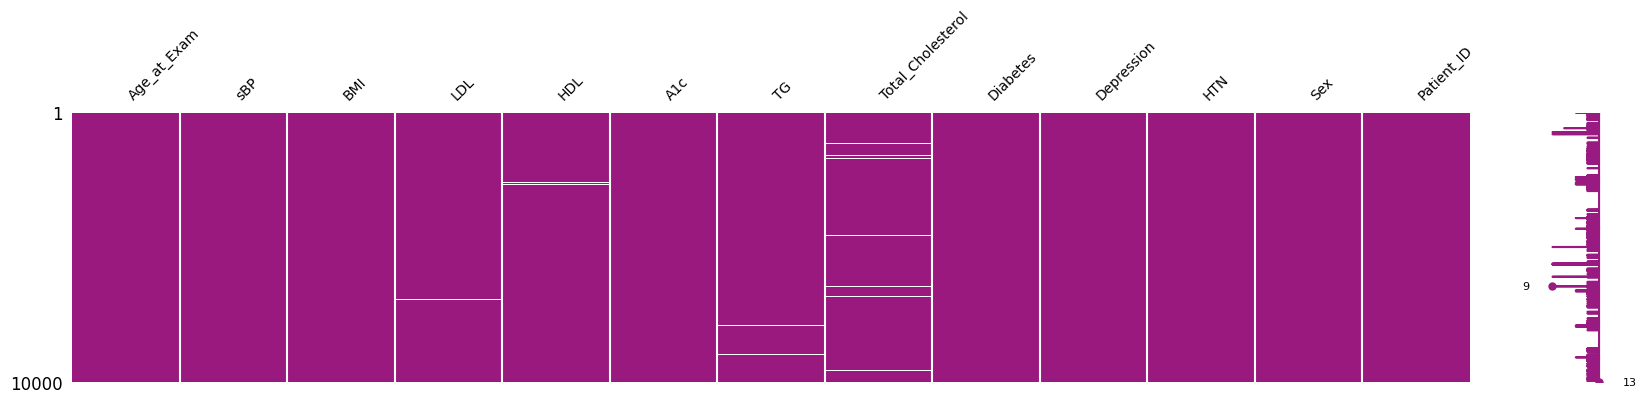

In [ ]:
#Visualize missing values
msno.matrix(df, figsize=(20,3.5), fontsize=10, color=(.6,.1,0.5))

In [ ]:
#Replace categorical values with numerical equivalents
df['Sex'].replace({'Female' : 1, 'Male' : 0}, inplace=True)
df.head()

,Age_at_Exam,sBP,BMI,LDL,HDL,A1c,TG,Total_Cholesterol,Diabetes,Depression,HTN,Sex,Patient_ID
0,65,126.0,31.000000,1.66,1.11,5.4,2.28,3.81,0,0,0,1,4001000000255903
1,62,135.0,25.846483,2.49,1.37,5.8,1.37,4.48,0,0,1,1,4001000000256456
2,63,133.0,30.900000,1.65,NaN,6.1,0.76,NaN,0,0,1,0,1001000000000054
3,51,136.0,56.710775,2.80,1.94,6.0,0.99,5.19,0,0,0,1,4001000000259496
4,40,123.0,33.067867,2.48,1.17,5.8,1.04,4.12,0,1,0,1,4001000000262094


In [ ]:
#Imputing missing values wiht the median
median_sBP = df['sBP'].median()
df['sBP'].fillna(median_sBP, inplace=True)

median_LDL = df['LDL'].median()
df['LDL'].fillna(median_LDL, inplace=True)

median_HDL = df['HDL'].median()
df['HDL'].fillna(median_HDL, inplace=True)

median_TG = df['TG'].median()
df['TG'].fillna(median_TG, inplace=True)

median_Total_Cholesterol = df['Total_Cholesterol'].median()
df['Total_Cholesterol'].fillna(median_Total_Cholesterol, inplace=True)

print(df.isnull().sum().sum())

0


Data exploration

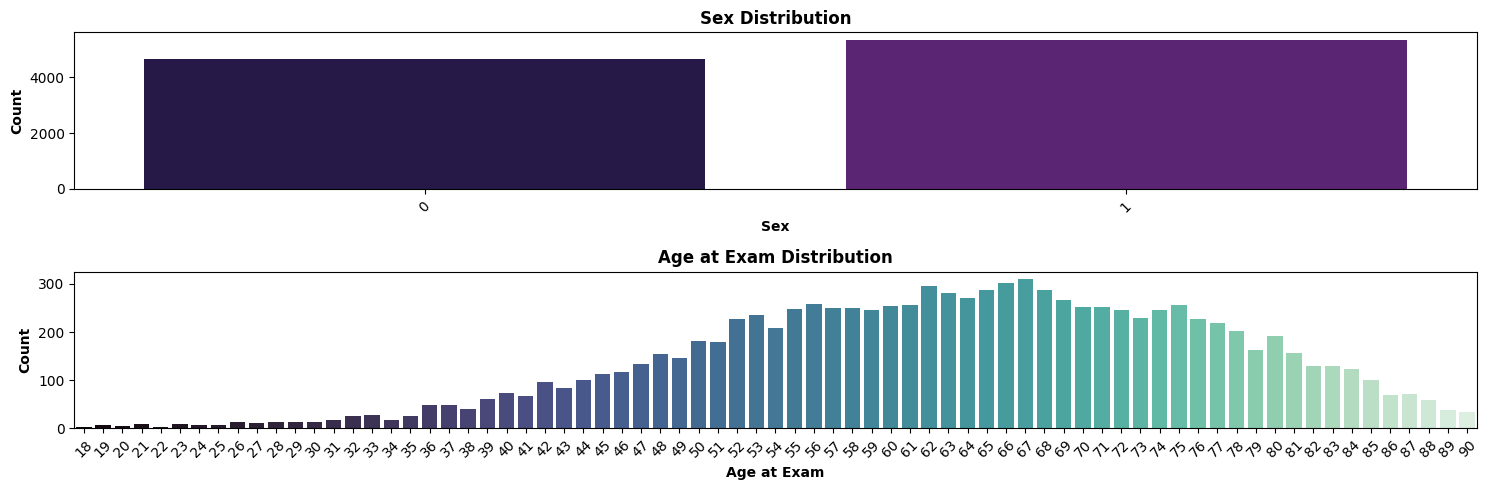

In [ ]:
#Distribution of equity focused varibles
sns.set_palette("magma")

filtered_data = df[(df['Sex'] != 'Unknown/Invalid') & (df['Age_at_Exam'] != '[0-10)')]
fig, axes = plt.subplots(2, 1, figsize=(15, 5))  # 1 row, 2 columns

#Sex
sns.countplot(ax=axes[0], x='Sex', data=filtered_data)
axes[0].set_title('Sex Distribution', fontweight='bold')
axes[0].set_xlabel('Sex', fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].tick_params(axis='y')

#Age
sns.countplot(ax=axes[1], x='Age_at_Exam', data=filtered_data, palette='mako')
axes[1].set_title('Age at Exam Distribution', fontweight='bold')
axes[1].set_xlabel('Age at Exam', fontweight='bold')
axes[1].set_ylabel('Count', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y')

plt.tight_layout()
plt.show()


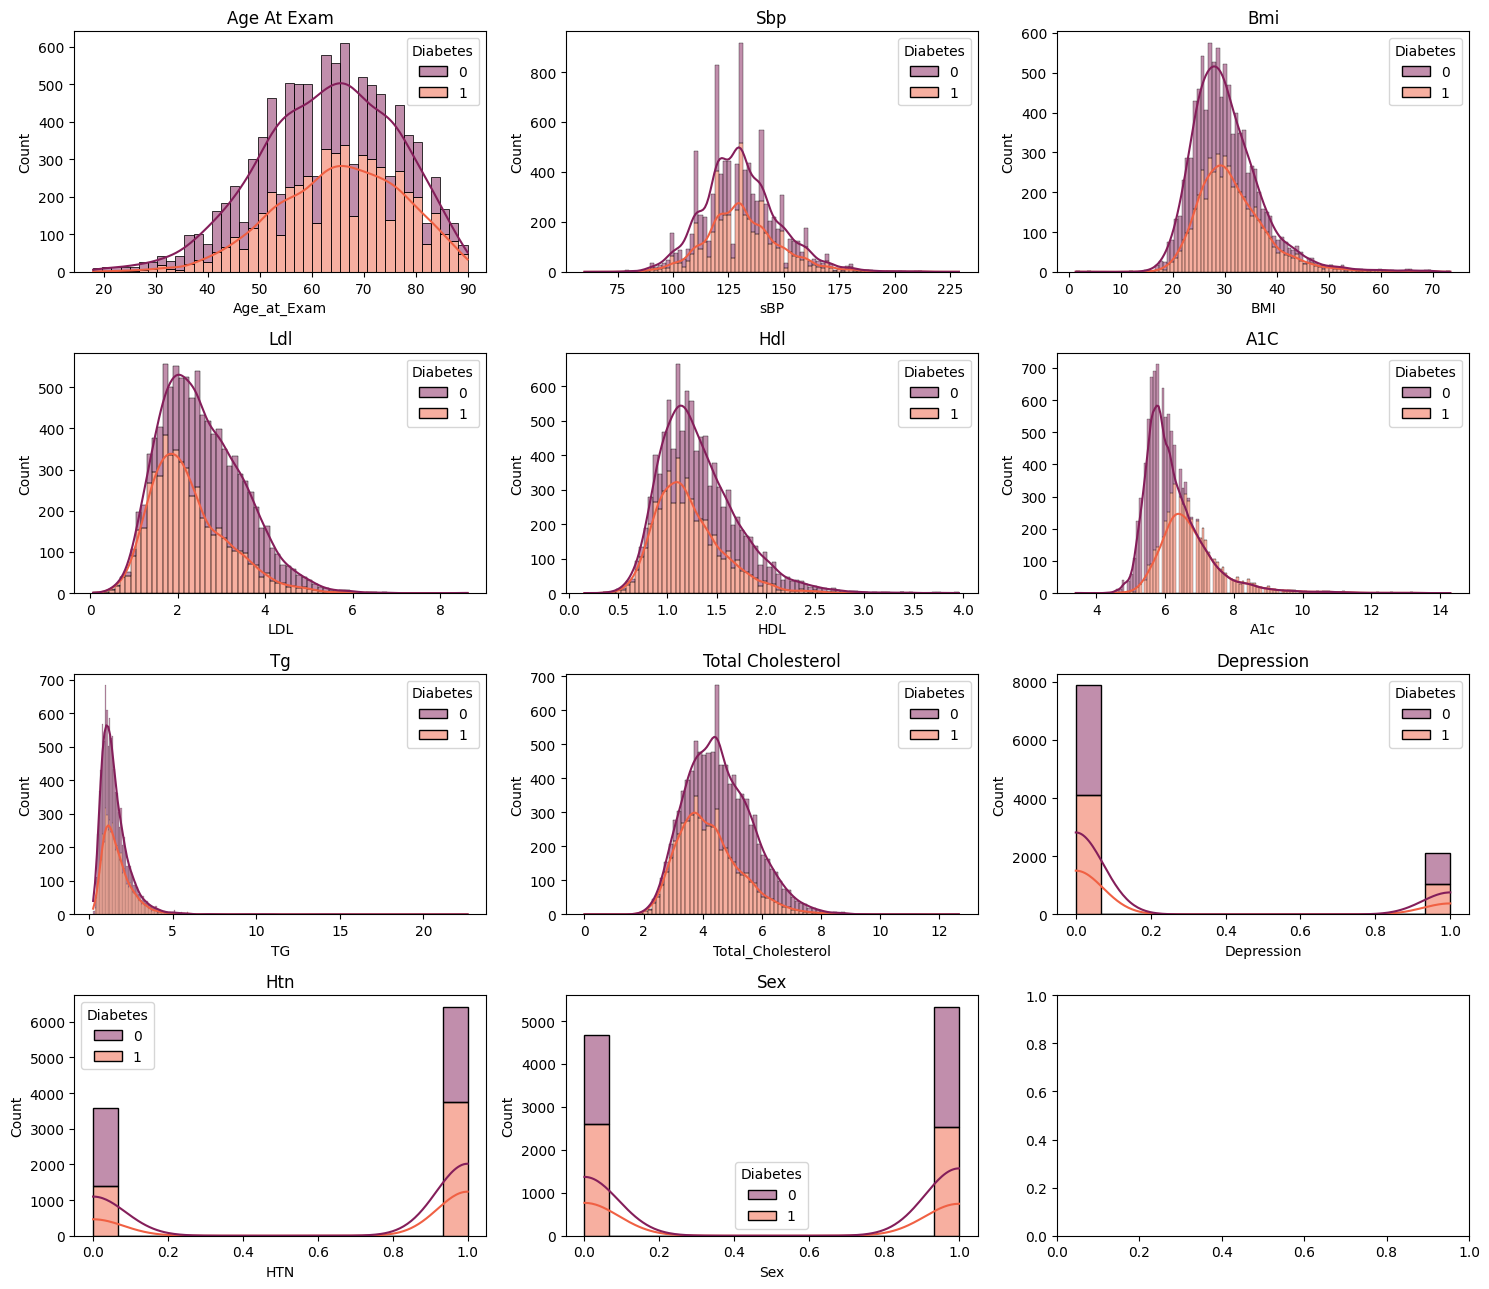

In [ ]:
#Distibution by diabetes class
variables = [
    'Age_at_Exam','sBP', 'BMI',
    'LDL','HDL', 'A1c',
    'TG','Total_Cholesterol', 'Depression',
    'HTN', 'Sex'
]

# Create a grid of subplots with 3 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 13))

# Loop over each selected feature to create a subplot for each
for i, column in enumerate(variables):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'subject'
    sns.histplot(df, x=column, hue='Diabetes', kde=True, palette='rocket', ax=axs[x][y],
                 multiple='stack')
    axs[x][y].set_title(column.replace('_', ' ').title())

# Adjust the layout and display all the subplots
plt.tight_layout()
plt.show()

Model preperation

In [ ]:
#dropping Sex and age
df.drop(['LDL','HDL'], axis=1, inplace=True)

In [ ]:
# Grouping by Patient ID
grouped = df.groupby('Patient_ID')
grouped_dfs = [group for _, group in grouped]

# Splitting data
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=42)

train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

# Displaying the shape
train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

((8005, 11), (1995, 11))

In [ ]:
#Identifying numerical columns
num_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('Patient_ID')
num_cols.remove('Diabetes')
num_cols.remove('Sex')
num_cols.remove('Depression')
num_cols.remove('HTN')

#Normalization
scaler = StandardScaler()

train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

train_df.head()

,Age_at_Exam,sBP,BMI,A1c,TG,Total_Cholesterol,Diabetes,Depression,HTN,Sex,Patient_ID
7872,-0.393679,0.329089,-0.683339,-0.064471,-0.279827,2.330489,1,1,0,1,1001000000100564
1398,1.824648,0.743613,-0.358860,-0.170760,-0.289835,-0.807187,0,1,1,0,4001000000086238
4978,0.677237,-0.618394,-1.094947,-0.064471,0.330635,-0.186742,1,0,1,1,4001000000318186
8010,0.753731,-0.322306,-0.040967,0.041819,0.060431,-0.399466,1,0,1,1,1002000000003752
2993,-2.153042,-1.921185,-1.404103,-1.021074,-0.970350,0.495747,0,0,0,1,1002000000155308


In [ ]:
#Class distribution in traiing set
class_distribution = train_df.groupby('Patient_ID').apply(lambda x : x.iloc[-1]['Diabetes']).value_counts()
class_distribution

0.0    3552
1.0    3329
dtype: int64

In [ ]:
#Creating sequences
factors = ['Age_at_Exam', 'sBP', 'BMI', 'A1c', 'TG', 'Total_Cholesterol','Depression','HTN', 'Sex']
train_normalized = train_df
test_normalized = test_df

def create_sequences(df, sequence_length=100):
    sequences = []
    output = []
    for i in range(0, len(df) - sequence_length + 1, sequence_length):
        sequence = df[i:i + sequence_length]
        label = sequence['Diabetes'].iloc[0]
        sequences.append(sequence[factors].values)
        output.append(label)

    return np.array(sequences), np.array(output)

X_train, y_train = create_sequences(train_normalized, sequence_length=100)
X_test, y_test = create_sequences(test_normalized, sequence_length=100)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 100, 9), (80,), (19, 100, 9), (19,))

LSTM Model

In [ ]:
t.manual_seed(321) # for reporducability

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 64  # Number of hidden units in RNN
num_classes = 2  # For two-class classification
epochs = 20
learning_rate = 0.1
batch_size = 16
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
rnn_layer2 = nn.LSTM(hidden_size, hidden_size, batch_first=True)
dropout2 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_loss_list = []

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
precision_list = []
recall_list = []
f1_list = []


# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out, _ = rnn_layer2(out)
        out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        loss = loss_fn(out, Y) + landa * l2_term
        #loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    all_predictions = []
    all_true_labels = []

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            out, _ = rnn_layer2(out)
            out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            out, _ = rnn_layer2(out)
            out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Store predictions and true labels
        all_predictions.extend(predicted.cpu().numpy())
        all_true_labels.extend(Y.cpu().numpy())


        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Convert lists to NumPy arrays
    all_predictions = np.array(all_predictions)
    all_true_labels = np.array(all_true_labels)

    # Calculate metrics
    # Calculate precision, recall, F1 score, and accuracy
    precision = precision_score(all_true_labels, all_predictions, average='weighted')
    recall = recall_score(all_true_labels, all_predictions, average='weighted')
    f1 = f1_score(all_true_labels, all_predictions, average='weighted')
    accuracy = accuracy_score(all_true_labels, all_predictions)

    # Append metrics to lists
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    validation_accuracy_list.append(validation_accuracy)

    # Print the evaluation metrics
    print(f'Precision: {precision}, F1 Score: {f1}, Recall:{recall}, Accuracy:{validation_accuracy}')

    # Set the model back to train mode
    rnn_layer1.train()
    rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/20 ---> Train Accuracy: 56.25%, Validation Accuracy: 52.63157894736842%
Precision: 0.1111111111111111, F1 Score: 0.16666666666666666, Recall:0.3333333333333333, Accuracy:52.63157894736842
Epoch 1/20 ---> Train Accuracy: 50.0%, Validation Accuracy: 42.10526315789474%
Precision: 0.0, F1 Score: 0.0, Recall:0.0, Accuracy:42.10526315789474
Epoch 2/20 ---> Train Accuracy: 46.25%, Validation Accuracy: 52.63157894736842%
Precision: 1.0, F1 Score: 1.0, Recall:1.0, Accuracy:52.63157894736842
Epoch 3/20 ---> Train Accuracy: 45.0%, Validation Accuracy: 47.36842105263158%
Precision: 0.3333333333333333, F1 Score: 0.3333333333333333, Recall:0.3333333333333333, Accuracy:47.36842105263158
Epoch 4/20 ---> Train Accuracy: 53.75%, Validation Accuracy: 52.63157894736842%
Precision: 0.1111111111111111, F1 Score: 0.16666666666666666, Recall:0.3333333333333333, Accuracy:52.63157894736842
Epoch 5/20 ---> Train Accuracy: 56.25%, Validation Accuracy: 47.36842105263158%
Precision: 0.3333333333333333, F1 S

In [ ]:
# Calculate and print average metrics
avg_precision = sum(precision_list) / len(precision_list)
avg_recall = sum(recall_list) / len(recall_list)
avg_f1 = sum(f1_list) / len(f1_list)

print(f'Average Precision: {avg_precision:.4f}')
print(f'Average Recall: {avg_recall:.4f}')
print(f'Average F1 Score: {avg_f1:.4f}')

# Assuming train_accuracy_list and test_accuracy_list are your lists
train_avg_accuracy = sum(train_accuracy_list) / len(train_accuracy_list)
valid_avg_accuracy = sum(validation_accuracy_list) / len(validation_accuracy_list)

print(f"Average Training Accuracy: {train_avg_accuracy:.4f}")
print(f"Average Validation Accuracy: {valid_avg_accuracy:.4f}")

Average Precision: 0.1944
Average Recall: 0.3500
Average F1 Score: 0.2350
Average Training Accuracy: 52.6875
Average Validation Accuracy: 51.3158


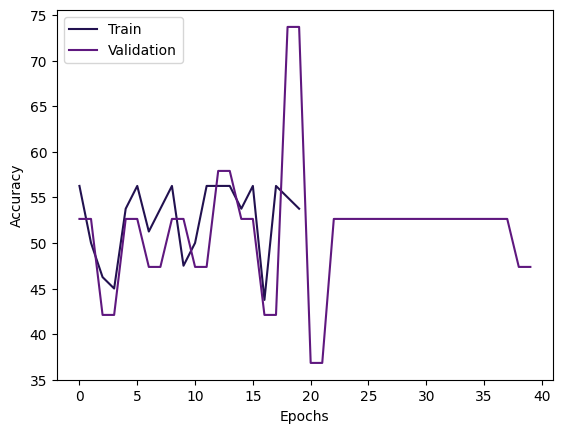

In [ ]:
# Plot training and test accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Grid Search

In [ ]:
t.manual_seed(321)

# Data preparation
train_dataset = TensorDataset(t.tensor(X_train, dtype=t.float32), t.tensor(y_train, dtype=t.long))
test_dataset = TensorDataset(t.tensor(X_test, dtype=t.float32), t.tensor(y_test, dtype=t.long))

# Hyperparameter grid
hyperparameter_grid = {
    'hidden_size': [64, 128, 256, 512],
    'epochs': [10, 30, 50, 100],
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [16, 32, 50, 64, 100, 250],
    'landa': [0.0001, 0.001, 0.01]
}

# Lists to store results
grid_search_results = []

# Perform grid search
for hyperparameters in product(*hyperparameter_grid.values()):
    hyperparameter_dict = dict(zip(hyperparameter_grid.keys(), hyperparameters))

    # Model construction
    rnn_layer1 = nn.LSTM(input_size, hyperparameter_dict['hidden_size'], batch_first=True)
    dropout1 = nn.Dropout(0.5)
    rnn_layer2 = nn.LSTM(hyperparameter_dict['hidden_size'], hyperparameter_dict['hidden_size'], batch_first=True)
    dropout2 = nn.Dropout(0.5)
    fc_layer1 = nn.Linear(hyperparameter_dict['hidden_size'], hyperparameter_dict['hidden_size'])
    fc_layer2 = nn.Linear(hyperparameter_dict['hidden_size'], num_classes)
    dropout_fc = nn.Dropout(0.2)
    relu = nn.ReLU()
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=hyperparameter_dict['learning_rate'])

    # Data loaders
    train_data_loader = DataLoader(train_dataset, batch_size=hyperparameter_dict['batch_size'], shuffle=True)
    test_data_loader = DataLoader(test_dataset, batch_size=hyperparameter_dict['batch_size'], shuffle=False)

    # Training loop
    for epoch in range(hyperparameter_dict['epochs']):
        if epoch % 10 == 0:
            learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out, _ = rnn_layer2(out)
        out = dropout2(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        l2_term = sum([(w ** 2).sum() for w in list(rnn_layer1.parameters()) + list(rnn_layer2.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters())])
        loss = loss_fn(out, Y) + landa * l2_term
        #loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation
    rnn_layer1.eval()
    rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            out, _ = rnn_layer2(out)
            out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            out, _ = rnn_layer2(out)
            out = dropout2(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate average accuracy for the validation set
    avg_validation_accuracy = sum(validation_accuracy_list) / len(validation_accuracy_list)

    # Append results to the grid search results list
    grid_search_results.append({
        'hyperparameters': hyperparameter_dict,
        'avg_validation_accuracy': avg_validation_accuracy
    })

# Find the best hyperparameters
best_result = max(grid_search_results, key=lambda x: x['avg_validation_accuracy'])
best_hyperparameters = best_result['hyperparameters']

print("Best Hyperparameters:")
print(best_hyperparameters)
print("Best Average Validation Accuracy:", best_result['avg_validation_accuracy'])


Epoch 9/20 ---> Train Accuracy: 43.75%, Validation Accuracy: 47.36842105263158%
Epoch 9/20 ---> Train Accuracy: 55.0%, Validation Accuracy: 52.63157894736842%
Epoch 9/20 ---> Train Accuracy: 43.75%, Validation Accuracy: 47.36842105263158%
Epoch 9/20 ---> Train Accuracy: 57.5%, Validation Accuracy: 52.63157894736842%
Epoch 9/20 ---> Train Accuracy: 43.75%, Validation Accuracy: 47.36842105263158%
Epoch 9/20 ---> Train Accuracy: 56.25%, Validation Accuracy: 52.63157894736842%
Epoch 9/20 ---> Train Accuracy: 43.75%, Validation Accuracy: 47.36842105263158%
Epoch 9/20 ---> Train Accuracy: 47.5%, Validation Accuracy: 47.36842105263158%
Epoch 9/20 ---> Train Accuracy: 43.75%, Validation Accuracy: 47.36842105263158%
Epoch 9/20 ---> Train Accuracy: 56.25%, Validation Accuracy: 52.63157894736842%
Epoch 9/20 ---> Train Accuracy: 43.75%, Validation Accuracy: 47.36842105263158%
Epoch 9/20 ---> Train Accuracy: 56.25%, Validation Accuracy: 52.63157894736842%
Epoch 9/20 ---> Train Accuracy: 47.5%, Vali

Model was rerun and reevaluated using the best hyperparameters, identified by the grid search